# PART A

#### DOMAIN: 

Botanical Research

#### CONTEXT: 

University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at 
various stages of growth. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a plant's species from a photo. 

#### DATA DESCRIPTION: 

The dataset comprises of images from 12 plant species. 
Source: https://www.kaggle.com/c/plant-seedlings-classification/data.


#### PROJECT OBJECTIVE: 

To create a classifier capable of determining a plant's species from a photo.

## 1. Import and Understand the data:

The neccessary libraries are imported below.

In [25]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc,classification_report, roc_curve
from tensorflow.keras import optimizers
from keras import regularizers
from keras.optimizers import SGD
from tensorflow.keras import backend
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler

In [26]:
images_path = 'C:\\Users\\ASUS\\plant-seedlings-classification.zip'

## The zip file link is stored in "images_path" variable.

In [27]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [28]:
import cv2
import os


### A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python. 

In [29]:
from zipfile import ZipFile
with ZipFile(images_path,'r') as zip:
  zip.extractall()

In [30]:
pwd

'C:\\Users\\ASUS'

##### The zip file is extracted using python code.

#### C:\\Users\\ASUS\\plant-seedlings-classification.zip\\plant-seedlings-classification\\train

The "plant-seedlings-classification.zip" is extracted and "plant-seedlings-classification" is the extracted folder that has datasets.

### B. Map the images from train folder with train labels to form a DataFrame

In [55]:
import os
import cv2

dataset = 'C:\\Users\\ASUS\\plant-seedlings-classification\\train'
X = []
y = []
labels = []

# list all folders inside train directory
for i in os.listdir(dataset):
    print(i)
    if i!= '.DS_Store':   
      labels.append(i)        
      for j in os.listdir(os.path.join(dataset, i)):
        # read each image inside train directory one by one
        dummy = cv2.imread(os.path.join(dataset, i, j))
        dummy = cv2.resize(dummy, (256,256))   # Resizing can be any number - 32 is just kept for standard reference
        X.append(dummy)
        y.append(i)

.DS_Store
Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse
Small-flowered Cranesbill
Sugar beet


The images are mapped from train folder with train labels and 

##### There are 12 Train lables, they are:

Black-grass

Charlock

Cleavers

Common Chickweed

Common wheat

Fat Hen

Loose Silky-bent

Maize

Scentless Mayweed

Shepherds Purse

Small-flowered Cranesbill

Sugar beet

In [56]:
print(len(X), len(y))

4750 4750


- There are totally 4750 plant-seedlings in the given dataset with 12 classes (Train Labels)

### C. Write a function that will select n random images and display images along with its species.

#### The code takes 10 random images and displays it with its species name.

[2168 2696 2050  371 2106 4646 2422  854 2875 1514]


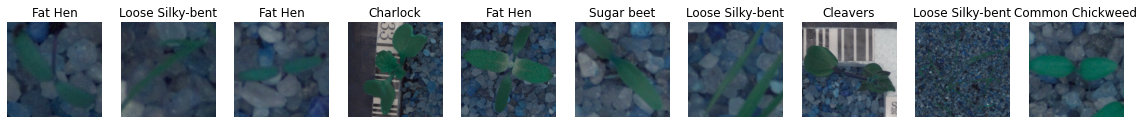

In [60]:
import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
import numpy as np
rand = np.random.randint(0, len(X), 10) # Generating 10 random numbers out of total number of flowers
print(rand)
plt.figure(figsize=(20, 20))
for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    plt.imshow(X[j])  # greens, reds, blues, rgb
    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()

### 10 random images are picked up and displayed with its name.

## 2. Data Preprocessing: 

### A. Create X & Y from the DataFrame.

### B. Encode labels of the images.

### C. Unify shape of all the images.

### D. Normalise all the images.

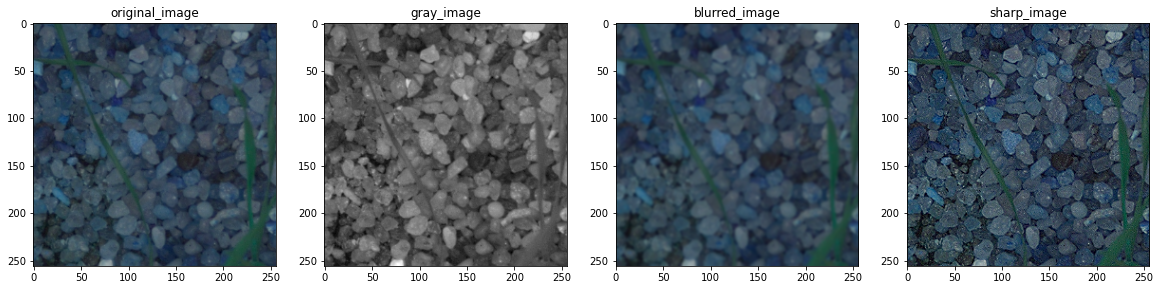

In [61]:
import random

# Original Image
img_org = random.choice(X)

# Gray Image
gray_image = cv2.cvtColor(img_org, cv2.COLOR_RGB2GRAY)

# Blur Image
blur_img = cv2.GaussianBlur(img_org,ksize=(5,5),sigmaX=0,sigmaY=0)

# Sharp Image
sharp_filter = np.array([[0,-1,0],
                        [-1,5,-1],
                        [0,-1,0]])

sharp_img = cv2.filter2D(img_org,kernel=sharp_filter,ddepth=-1)

img_title = ['original_image', 'gray_image', 'blurred_image', 'sharp_image']

plt.figure(figsize=(20,20))
for i,img in enumerate([img_org, gray_image, blur_img, sharp_img]):
    plt.subplot(1,4,i+1)
    plt.title(img_title[i])
    plt.imshow(img,cmap='gray')

Here the original image is converted nto gray image and then blurred.

The sharp filter is used to produce a sharp image. (as shown above)

In [62]:
X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)

(4750, 256, 256, 3) (4750,)


### 3.A. Split the data into train and test data

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

The train and test datas are reshaped

In [65]:
# Reshaping the images for train and test folders

X_train_ML = X_train.astype('float32')
X_train_ML = X_train_ML.reshape(X_train_ML.shape[0],256,256,3)
X_train_ML = X_train_ML / 255

X_test_ML = X_test.astype('float32')
X_test_ML = X_test_ML.reshape(X_test_ML.shape[0],256,256,3)
X_test_ML = X_test_ML / 255


print('Train_Shape:', X_train_ML.shape, y_train.shape)
print('Test_Shape:', X_test_ML.shape, y_test.shape)

Train_Shape: (3800, 256, 256, 3) (3800,)
Test_Shape: (950, 256, 256, 3) (950,)


In [66]:
# one hot encode outputs


import pandas as pd
y_train_NN = pd.get_dummies(y_train)
y_test_NN = pd.get_dummies(y_test)

## 3. Model Training: 

### B. Create new CNN architecture to train the model.

In [112]:
backend.clear_session()
random.seed(42)
tf.random.set_seed(42)

In [113]:
### define model

import tensorflow 
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

# model architecture building
model_1 = Sequential()

model_1.add(BatchNormalization(input_shape = (256, 256, 3)))

model_1.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (32, 32, 3))) 
model_1.add(MaxPooling2D(pool_size = 2))


model_1.add(Convolution2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = 2))

model_1.add(Flatten()) 

# fully connected layer
model_1.add(Dense(units = 64,activation = 'relu'))

# Classification layer
model_1.add(Dense(units = 12, activation = 'softmax'))

In [114]:
from tensorflow.keras.optimizers import Adam
ad = optimizers.Adam(learning_rate = 0.001)
model_1.compile(optimizer= ad, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 256, 256, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                        

In [115]:
#Fit the model
histroy = model_1.fit(X_train_ML, y_train_NN, validation_data=(X_test_ML, y_test_NN), epochs=30, batch_size=32, verbose=1)

Epoch 1/30
119/119 [==============================] - 150s 1s/step - loss: 2.4766 - accuracy: 0.3087 - val_loss: 2.3617 - val_accuracy: 0.1674
Epoch 2/30
119/119 [==============================] - 151s 1s/step - loss: 1.3014 - accuracy: 0.5589 - val_loss: 1.7430 - val_accuracy: 0.3632
Epoch 3/30
119/119 [==============================] - 150s 1s/step - loss: 0.8280 - accuracy: 0.7150 - val_loss: 1.1691 - val_accuracy: 0.5989
Epoch 4/30
119/119 [==============================] - 149s 1s/step - loss: 0.4953 - accuracy: 0.8424 - val_loss: 1.1460 - val_accuracy: 0.6095
Epoch 5/30
119/119 [==============================] - 148s 1s/step - loss: 0.2895 - accuracy: 0.9103 - val_loss: 1.3648 - val_accuracy: 0.6000
Epoch 6/30
119/119 [==============================] - 148s 1s/step - loss: 0.1172 - accuracy: 0.9679 - val_loss: 1.5895 - val_accuracy: 0.6284
Epoch 7/30
119/119 [==============================] - 1552s 13s/step - loss: 0.0655 - accuracy: 0.9837 - val_loss: 1.7818 - val_accuracy: 0.61

### C. Train the model on train data and validate on test data.

Text(0.5, 1.0, 'Training and validation loss')

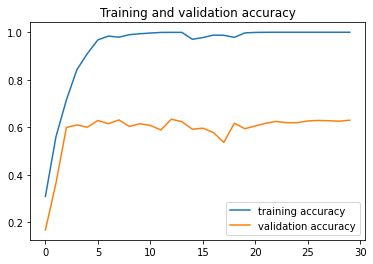

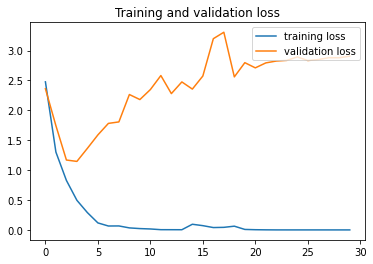

In [116]:
## Accuracy and Loss plots

accuracy      = histroy.history['accuracy']
val_accuracy  = histroy.history['val_accuracy']
loss     = histroy.history['loss']
val_loss = histroy.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

##### These are charts for accuracy and loss for training and validation data.

- The training accuracy is   but the validation accuracy obtained is 

In [117]:
Comparison = pd.DataFrame({'Method':['Neural Network'], 'Train accuracy': max(accuracy), 
                           'Test accuracy': max(val_accuracy)})
Comparison = Comparison[['Method', 'Train accuracy', 'Test accuracy']]

C = pd.concat([Comparison])

C

,Method,Train accuracy,Test accuracy
0,Neural Network,1.0,0.633684


Here the training accuracy is of 100% but the test accuracy is of 63%. 

#### The method here is CNN.

### D. Select a random image and print actual label and predicted label for the same.

enter a image number:850
labels: ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
1/1 [==============================] - 0s 32ms/step
Softmax Outputs: [[6.9456978e-13 1.0481845e-04 1.5576892e-04 2.8492313e-13 1.1304578e-12
  6.5488019e-03 1.0460985e-13 4.3266454e-10 7.7495662e-07 8.2227838e-05
  9.9310750e-01 6.0853846e-09]]
0.9999999
Predicted_Label: Small-flowered Cranesbill


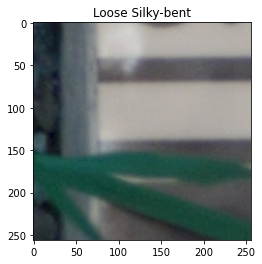

In [121]:
# Predicting and vizualizing the test image

import matplotlib.pyplot as plt
%matplotlib inline

n = int(input("enter a image number:"))

print('labels:', labels)
plt.title(y_test[n])
plt.imshow(X_test[n])
y_pred = model_1.predict(X_test_ML[n].reshape(1,256,256,3))
print("Softmax Outputs:", y_pred)
print(y_pred.sum())


# Convert the predicted probabilities to labels

for i in y_pred:
    for j, k in enumerate(i):
        if k == y_pred.max():
            print('Predicted_Label:', labels[j])

A random number is given as input and then the label of that image is predicted.

#### Here the image is of "Loose Silky-bent".

# CV_PROJECT1_PART_A         IS      OVER.